[1] https://drive.google.com/file/d/1D4SRYpyFxmxLVXdZmWwrR-WYja3eS-zt/view?usp=sharing   archivo cvs  con los  datos
[2] https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8/about_data  descripcion  y origen de la data
[3] pdf  UCR-COMPSTAT062618
[4] pdf  MO_CODES_Numerical_20191119
[5] pdf  UCR_Manual

# Descripción de la data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statistics as sts
import datetime
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,mean_squared_error, r2_score



In [2]:
data = pd.read_csv("Crime_Data_from_2020_to_Present.csv")
data.head()


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910707 entries, 0 to 910706
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           910707 non-null  int64  
 1   Date Rptd       910707 non-null  object 
 2   DATE OCC        910707 non-null  object 
 3   TIME OCC        910707 non-null  int64  
 4   AREA            910707 non-null  int64  
 5   AREA NAME       910707 non-null  object 
 6   Rpt Dist No     910707 non-null  int64  
 7   Part 1-2        910707 non-null  int64  
 8   Crm Cd          910707 non-null  int64  
 9   Crm Cd Desc     910707 non-null  object 
 10  Mocodes         783696 non-null  object 
 11  Vict Age        910707 non-null  int64  
 12  Vict Sex        789672 non-null  object 
 13  Vict Descent    789663 non-null  object 
 14  Premis Cd       910697 non-null  float64
 15  Premis Desc     910153 non-null  object 
 16  Weapon Used Cd  315247 non-null  float64
 17  Weapon Des

* El  tipo de dato es correcto para la  mayoria de columnas.
* Se debe asignar valores númericos a las  variables categoricas que esten en tipo string,
* Separar  el mes  y los años  de la columna  DATE OCC.
* DR_NO es un Id  se puede eliminar.
* Date Rptd  y date occ  tienen la misma información.
* AREA  y AREA NAME  contiene la misma  información,  se puede  eliminar AREA NAME.
* CRM CD DESC,  es la descripción  del crimen cometido,  dado que el  codigo  catgoriza  los  crimenes,  se puede  eliminar dicha columna. 
* WEAPON DESC, es la descripción  del arma  usada  durante el crimen, dado que  el codigo de arma  categoriza  dicha información podemos  eliminar la columna. 
* los MOCODES ,  varios  codigos del Modus Operandi: actividades  asociadas  con el sospechoso o la victima,  correspondientes a la descripción de las  circunstancias del crimen ([4]).
* PREMIS DESC es la descripción del lugar  donde se efectuo el crimen,  como esta asociado al  codigo , se  puede  eliminar  esta columna.
* la columna STATUS  debe categorizarse y la columna STATUS DESC, eliminarse 
* La columna CROSS STREET  tambien es desriptiva  con respecto al lugar  o calle especifica de  suceso.

Para las  columnas de descripción puede  hacerse un  analisis de  recurrencia de palabras, para  comprender mejor  los datos. 


In [4]:
data.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,9.107070e+05,910707.000000,910707.000000,910707.000000,910707.000000,910707.000000,910707.000000,910697.000000,315247.000000,910696.000000,66335.000000,2237.000000,64.00000,910707.000000,910707.000000
mean,2.180575e+08,1337.042061,10.698686,1116.307327,1.410830,500.809825,29.588992,306.502891,363.475262,500.552370,957.968222,983.913724,991.21875,33.989025,-118.059907
std,1.191945e+07,652.903148,6.102210,610.237433,0.491985,207.606033,21.851962,217.329569,123.700805,207.397779,110.627785,52.032905,27.06985,1.700407,5.894676
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-4.000000,101.000000,101.000000,110.000000,210.000000,310.000000,821.00000,0.000000,-118.667600
25%,2.104073e+08,900.000000,5.000000,589.000000,1.000000,331.000000,0.000000,101.000000,310.000000,331.000000,998.000000,998.000000,998.00000,34.014500,-118.429600
50%,2.205108e+08,1415.000000,11.000000,1141.000000,1.000000,442.000000,31.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.00000,34.058600,-118.321600
75%,2.304119e+08,1900.000000,16.000000,1615.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.00000,34.163400,-118.273900
max,2.499046e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.00000,34.334300,0.000000


* Se debe  hacer tratamiento de Outliers de VICT AGE,  buscar correlación entre los  crimenes reportados  con  edad cero y el tipo de crimen ejecutado para reconocer  si en  un valor  nulo o  es  un  valor  correcto. 
* Hacer conteo  de crimenes  por  codigo de crimen y analizar.
* La  columna Part1-2  clasifica los crimenes que  deben ser  reportados  al FBI (part1) y los que solo  registran la información de arresto.
* Los codigos de crimen  no son continuos, y con respecto a la documentación encontrada  se pueden  hacer  bins  clasificandolos  en  categorias más  grandes.([3])
* RPT DIST NO,  es una  sub clasificación del area, el codigo comienza con el mismo digito de clasificacion de la columna AREA.
* CRM CD es el mismo que CRM CD 1, según la  documentación encontrada [2]
* LON Y LOG  con entradas en cero deben ser tratadas  como entradas  nulas [2]


In [5]:
data.isna().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           127011
Vict Age               0
Vict Sex          121035
Vict Descent      121044
Premis Cd             10
Premis Desc          554
Weapon Used Cd    595460
Weapon Desc       595460
Status                 0
Status Desc            0
Crm Cd 1              11
Crm Cd 2          844372
Crm Cd 3          908470
Crm Cd 4          910643
LOCATION               0
Cross Street      767375
LAT                    0
LON                    0
dtype: int64

In [6]:
missing_v = pd.DataFrame(data.isna().sum())
missing_v = missing_v.rename(columns = {0: 'sum_missing_values'})
missing_v['porcentaje'] = (missing_v['sum_missing_values']/len(data))*100
missing_v

,sum_missing_values,porcentaje
DR_NO,0,0.000000
Date Rptd,0,0.000000
DATE OCC,0,0.000000
TIME OCC,0,0.000000
AREA,0,0.000000
AREA NAME,0,0.000000
Rpt Dist No,0,0.000000
Part 1-2,0,0.000000
Crm Cd,0,0.000000
Crm Cd Desc,0,0.000000


* Las columnas  referentes  al arma  usada  tienen  un 65% de datos  nulos , puede  hacerse un analisis paralelo de  frecuencia. 
* La columna Cross Street  tiene  un 84%  de  valores faltantes, puede eliminarse.
* Las columnas Crm cod 2,3,4  tienen mas del 90% de valores  nulos,  puede  hacerse un analisis  paralelo de frecuencia. 
* Las columnas  como  Vict Sex, Vict Descent, Mocodes  tiene un 13% de  valores  faltantes que dene ser tratados.
 

In [7]:
df=data.groupby(['Vict Descent']).size().reset_index(name='conteo')
df

,Vict Descent,conteo
0,-,2
1,A,19994
2,B,127950
3,C,3623
4,D,73
5,F,3910
6,G,65
7,H,277284
8,I,867
9,J,1279


* Esta  columna  puede organizarse en categorias mas amplias 

C:\Users\NATALY NEIRA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\NATALY NEIRA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


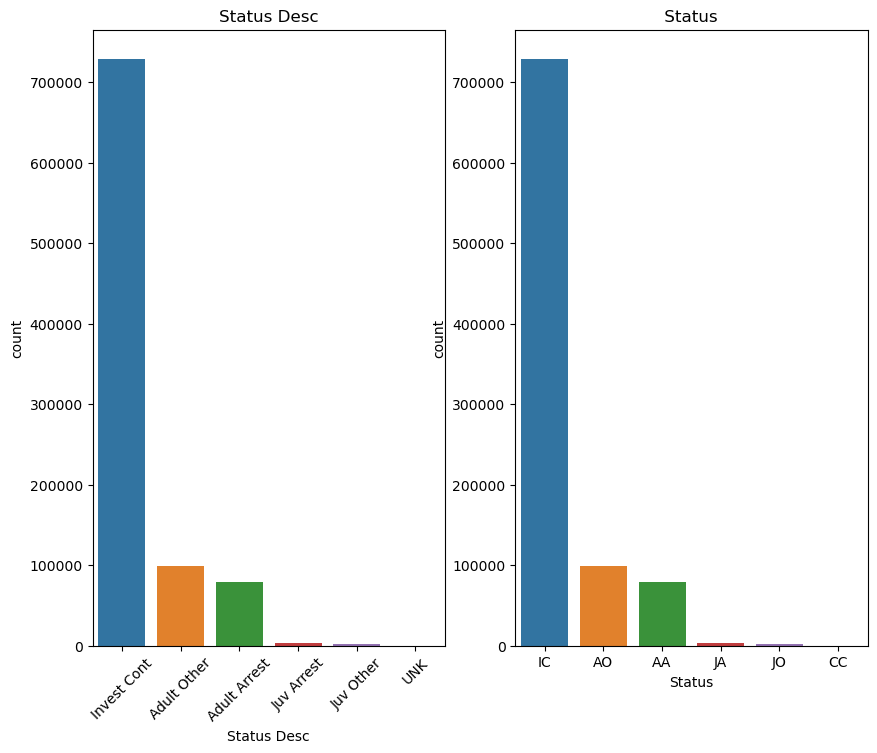

In [8]:
#df=data.groupby(['Status Desc']).size().reset_index(name='conteo')

df=data_num=pd.DataFrame(data.copy())

plt.figure(figsize=(10, 8))
a1=plt.subplot(121)
sns.countplot(df['Status Desc'],order=data_num['Status Desc'].value_counts().index)
a1.set_title('Status Desc')
plt.xticks(rotation=45) 


a2=plt.subplot(122)
sns.countplot(df['Status'],order=data_num['Status'].value_counts().index)
a2.set_title(' Status ')
plt.show()

* Las columnas Status Desc  y Status  entregan la misma  información 

C:\Users\NATALY NEIRA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\NATALY NEIRA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


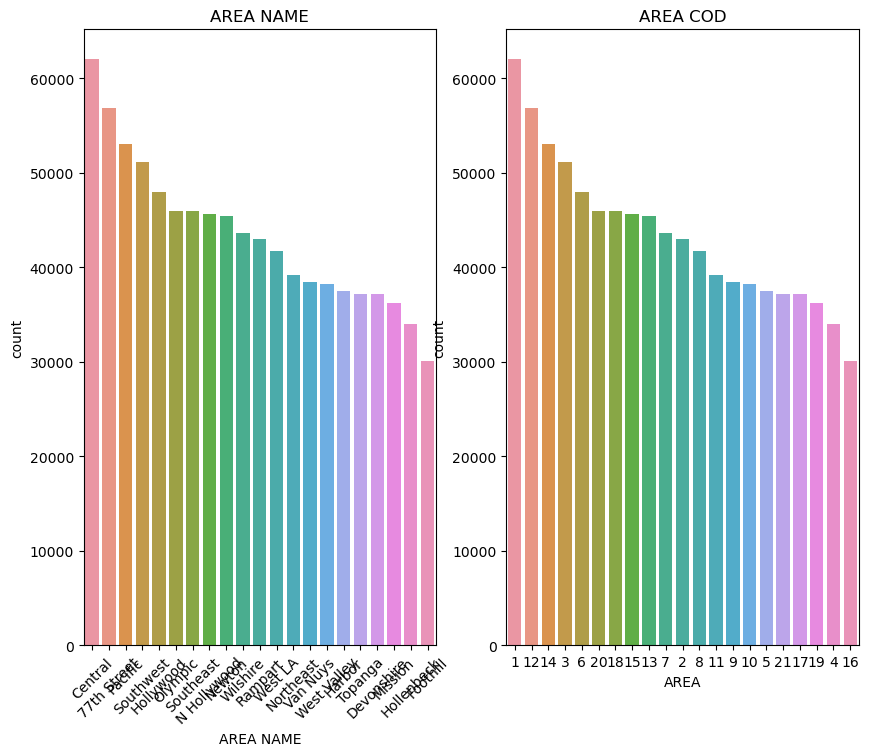

In [9]:
df=data_num=pd.DataFrame(data.copy())

plt.figure(figsize=(10, 8))
a1=plt.subplot(121)
sns.countplot(df['AREA NAME'], order=data_num['AREA NAME'].value_counts().index)
a1.set_title('AREA NAME')
plt.xticks(rotation=45) 


a2=plt.subplot(122)
sns.countplot(df['AREA'], order=data_num['AREA'].value_counts().index)
a2.set_title('AREA COD')
plt.show()

* Las  columnas  Area y area name   proporcionan la misma  información 

In [10]:
df=data.groupby(['LOCATION']).size().reset_index(name='conteo')
df

,LOCATION,conteo
0,00 17TH,1
1,00 17TH AV,10
2,00 17TH PL,1
3,00 18TH AV,10
4,00 19TH AV,17
...,...,...
65172,ZONAL,4
65173,ZONAL AV,9
65174,ZONAL ST,2
65175,ZOO,3


In [11]:
filtro_lon_cero = data[data['LON'] == 0]
tabla_location_lon_cero = filtro_lon_cero[['LOCATION']]

tabla_location_lon_cero

,LOCATION
565,3700 VETERAN AV
2411,2400 E 7TH ST
2636,LANKERSHIM
2923,OLYMPIC BL
3098,300 WORLD WY
...,...
497882,CHASE
705930,WASHINGTON BL
714905,PENDLETON
828155,3800 SHEWOOD PL


* La  columna LOCATION  da información mas exacta de la ubicación ,  Sin  embargo,  hay entradas con dirección  y no de LON y LAT,  Describe mejor la Ubicación la  columna LOCATION  pero  tiene demaciados  valores  distintos, y  la  ubicación puede restringirse al area, asi que se puede precindir de estas  tres columnas  

C:\Users\NATALY NEIRA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


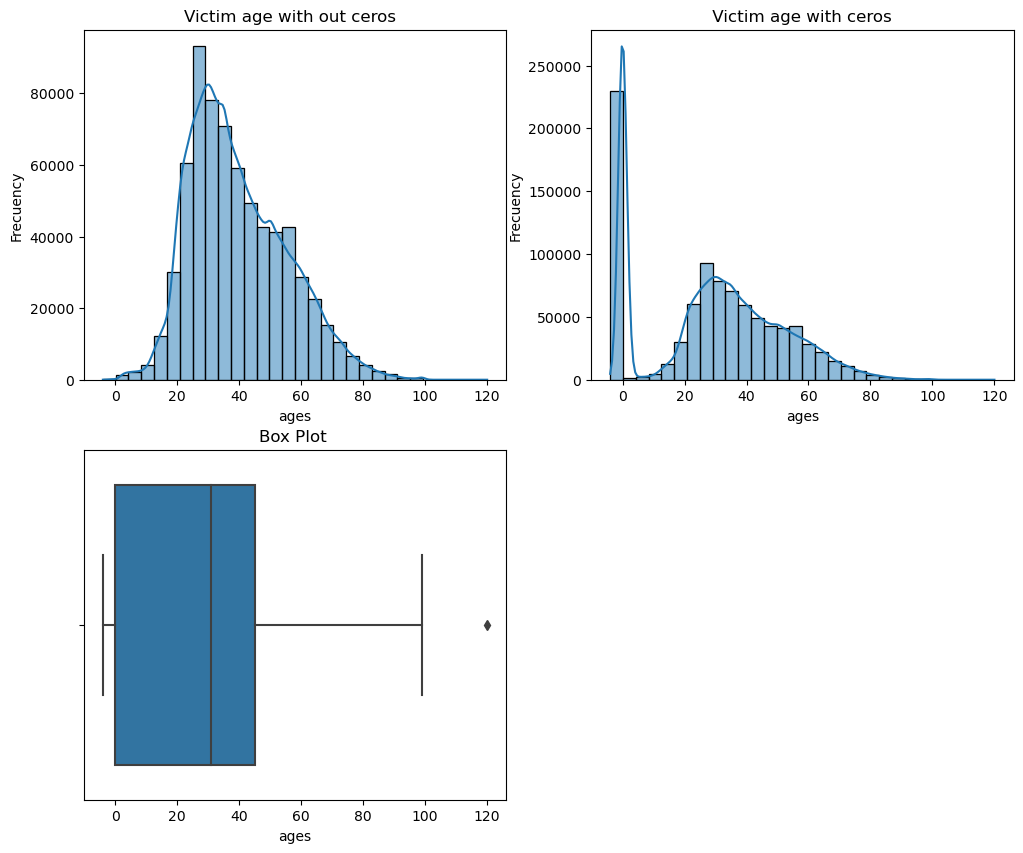

In [12]:
data_nonzero_vict_age = data[data['Vict Age'] != 0]

plt.figure(figsize=(12, 10))
a1=plt.subplot(221)
sns.histplot(data_nonzero_vict_age['Vict Age'], bins=30, kde=True)
a1.set_title('Victim age with out ceros  ')
a1.set_xlabel('ages')
a1.set_ylabel('Frecuency')


a2=plt.subplot(222)
sns.histplot(data['Vict Age'], bins=30, kde=True)
a2.set_title(' Victim age with ceros ')
a2.set_xlabel('ages')
a2.set_ylabel('Frecuency')


a3=plt.subplot(223)
sns.boxplot(data['Vict Age'])
a3.set_title('Box Plot ')
a3.set_xlabel('ages')
plt.show()

*  Para  la edad de la victima  es  necesario  hacer manejo de  outliers , puede hacerse con Z-score   ya que presenta  una  distribución  normalizada,  si se le quitan los ceros 
*  Debe hacerse  un analisis  para los datos en cero

# Filtar datos

In [13]:
data_num=pd.DataFrame(data.copy())

# crear  columna  mes y  años 
data_num['MONTH'] = data_num['DATE OCC'].str.split("/").str[0].astype(int)
data_num['YEAR'] = data_num['DATE OCC'].str.split("/").str[2].str.split(" ").str[0]
data_num['YEAR'] = data_num['YEAR'].astype(int)

# eliminar  columnas  no  numericas o  utiles para categorizar
data_num= data_num.drop(["DR_NO","DATE OCC","Date Rptd",'AREA NAME','Rpt Dist No','Crm Cd Desc',"Premis Desc",'Weapon Desc','Status Desc',"Crm Cd 1",'Cross Street','LON','LAT','LOCATION','Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Mocodes', 'Weapon Used Cd'], axis=1)

In [14]:
# Pasar a  valor numerico las columnas  categoricas 

#Vict sext
# 1: Female 2: Male 0: Unknown 
mapeo_diccionario = {'F': 1,'M':2,'X':0}
data_num['Vict Sex'] = data_num['Vict Sex'].map(mapeo_diccionario)


# vict descent , se  cambia las  categorias  por números  y se  re agrupan  en 
#1: Asian , 2: Black, 3:Hispanic , 4:american  indian, 5:Pacific Islander , 6:Hawaian, 7:white, 0: other, Unknow 

mapeo_diccionario = {'A': 1, 'B': 2,'C': 1, 'D': 0,'F': 1, 'G': 0,'H': 3, 'I': 4,'J': 1, 'K': 1,
                     'L': 1, 'Others': 0,'P': 5,'S': 6, 'U': 6,'V': 1,'W': 7, 'X': 0,'Z': 1,'-':0}
data_num['Vict Descent'] = data_num['Vict Descent'].map(mapeo_diccionario)

#Status
#1=Adult Arrest, 2=Adult Other, 3:Invest Cont, 4:Juv Arrest , 5:Juv Other 0: unkonw
mapeo_diccionario = {'AA': 1,'AO':2,'IC':3,'JA':4,'JO':5,'CC':0}
data_num['Status'] = data_num['Status'].map(mapeo_diccionario)



In [15]:
# manejo de NaNs 
modasex = data_num['Vict Sex'].mode().iloc[0]
data_num['Vict Sex'] = data_num['Vict Sex'].fillna(modasex)

modadesc = data_num['Vict Descent'].mode().iloc[0]
data_num['Vict Descent'] = data_num['Vict Descent'].fillna(modadesc)

data_num['Mocodes'] = data_num['Mocodes'].fillna(0)
data_num['Premis Cd'] = data_num['Premis Cd'].fillna(0)

#Weapon used  cd, crm cd 2,3,4
data_num['Weapon Used Cd'] = data_num['Weapon Used Cd'].fillna(0)

#crm cd 2,3,4


KeyError: 'Mocodes'

In [ ]:
#Manejo de  Outliers

def z_score(df_serie):
  smean = sts.mean(df_serie)
  ssigma = sts.stdev(df_serie)
  outliers = []
  for value in df_serie:
    if value > smean+2.5*ssigma or value < smean-2.5*ssigma:
      outliers.append(value)
  return len(outliers), set(outliers), df_serie.name, df_serie.count()


def iqr_(df_serie):
  quant = np.quantile(df_serie, [0.25, 0.75])
  iqr = quant[1]-quant[0]
  outliers = []
  for value in df_serie:
    if value > quant[1]+1.5*iqr or value < quant[0]-1.5*iqr:
      outliers.append(value)
  return len(outliers), set(outliers), df_serie.name, df_serie.count()

def print_outliers(outtuple):
  print(f'The number of outliers in the **{outtuple[2]}** series is {outtuple[0]}, which represents {outtuple[0]*100/outtuple[3]}%\nthe outlier values are {outtuple[1]}\n\n')


In [ ]:
data_nonzero_vict_age = data_num[data_num['Vict Age'] != 0]
vict_age_z_score =z_score(data_nonzero_vict_age['Vict Age'])
print_outliers(vict_age_z_score)
datos_a_eliminar = vict_age_z_score[1]
data_num = data_num[~data_num['Vict Age'].isin(datos_a_eliminar)]


In [ ]:
data_num.head()
#data_num.isna().sum()
#data_num.info()
#data_num.describe()

In [ ]:
data_string=pd.DataFrame(data.copy())
data_string= data_string.drop(["DR_NO","DATE OCC","Date Rptd","AREA NAME","Crm Cd 1",'LON','LAT','TIME OCC', 'AREA', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Mocodes', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Weapon Used Cd', 'Status','Status Desc', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4'], axis=1)

data_string.head()

# Análisis

# crimenes  por mes-año

In [ ]:
f_conteo = data_num.groupby(['YEAR', 'MONTH']).size().reset_index(name='conteo')
f_conteo = f_conteo.pivot(columns='YEAR',index='MONTH',values='conteo')
f_conteo

In [ ]:
f_conteo.iloc[:, :-1].describe() # se quita el año 2024

In [ ]:
f_conteo_cont = data_num.groupby(['YEAR', 'MONTH']).size().reset_index(name='conteo')
f_conteo_cont['MONTH'] = f_conteo_cont['MONTH'].astype(str)

for i in f_conteo_cont['MONTH']:
    if len(i) == 1:
        f_conteo_cont.loc[f_conteo_cont['MONTH'] == i, 'MONTH'] = '0' + i
        
f_conteo_cont['Year_month'] = f_conteo_cont['YEAR'].astype(str)+f_conteo_cont['MONTH'].astype(str)
f_conteo_cont_plot = f_conteo_cont[f_conteo_cont['YEAR']!=2024]
f_conteo_cont_plot = f_conteo_cont_plot.drop(['YEAR','MONTH'], axis=1)
f_conteo_cont_plot.tail()

In [ ]:
plt.figure(figsize=(12, 4))
sns.lineplot(x=f_conteo_cont_plot['Year_month'], y=f_conteo_cont_plot['conteo'], markers=True, dashes=False)
plt.axvline(x='202101', color='red', linestyle='--', linewidth=1.5)
plt.axvline(x='202201', color='red', linestyle='--', linewidth=1.5)
plt.axvline(x='202301', color='red', linestyle='--', linewidth=1.5)
plt.title('Evolución temporal de los datos')
plt.xlabel('Año-mes')
plt.ylabel('número de crimenes reportados')
plt.xticks(rotation=45)  # Rotamos las etiquetas del eje x para que sean legibles
plt.grid(True)
plt.tight_layout()
plt.show()

# Linear Regression Number of crimes next two months

In [ ]:
def Sxx(x):
  x_prom=np.average(x)

  S_xx=0
  for  i  in x:
    S_xx+=(i-x_prom)**2
  return S_xx

def Sxy(x,y):
  xsum=sum(x)
  ysum=sum(y)

  x_times_y = np.vectorize(lambda a, b: a * b)
  xysum= sum(x_times_y(x, y))

  S_xy=xysum-(xsum*ysum/len(x))
  return S_xy

def regresionLineal(x,y):
  B1=Sxy(x,y)/Sxx(x)
  B0=np.average(y)-(B1*np.average(x))
  return B0,B1

def modelo(x, y_train, size):
    y_pred = []
    x_mod = x[len(y_train):]
    B_0, B_1 = regresionLineal(x[:len(y_train)], y_train)
    for i in range(size):
        y_pred.append(B_0 + (B_1 * x_mod[i]))
    return y_pred, B_0, B_1


def error_cuadratico_real(y_test,y_pred):
  e = 0
  for i in range(len(y_test)):
    e = e + np.sqrt((y_test[i]-y_pred[i])**2)
  return e

In [ ]:
f_conteo_cont['Year_month'] = f_conteo_cont['Year_month'].astype(int)
y_train = f_conteo_cont[f_conteo_cont['YEAR']!=2024]['conteo'].values
y_test = f_conteo_cont[f_conteo_cont['YEAR']==2024]['conteo'].values
y_test = y_test[:-1]
x = f_conteo_cont['Year_month'].values
f_conteo_cont['Year_month'] = f_conteo_cont['Year_month'].astype(str)

y_pred, B0, B1 = modelo(x, y_train, 2)
y_pred1=(B0 + (B1 * x))
y_pred, B0, B1

In [ ]:
x = x.astype(str)
plt.figure(figsize=(12, 4))
plt.scatter(x=f_conteo_cont['Year_month'][:-1], y=f_conteo_cont['conteo'][:-1], label='Train data')

for i in range(2):
    color = 'green' if y_test[i] - y_pred[i] > 0 else 'red'
    plt.plot([x[i + len(y_train)], x[i + len(y_train)]], [y_test[i], y_pred[i]], color=color)

    diff = y_test[i] - y_pred[i]
    plt.text(x[i + len(y_train)], (y_test[i] + y_pred[i]) / 2, f'{diff:.2f}', color=color)
    
plt.scatter(x=x[len(y_train):-1], y = y_pred, label='Predicted data')
plt.plot(x, y_pred1,"red", label='Linear regression')
plt.title('Evolución temporal de los datos')
plt.xlabel('Año-mes')
plt.ylabel('número de crimenes reportados')
epsilon = error_cuadratico_real(y_test, y_pred)
plt.title('Predictions of data from table with quadratic error $\\epsilon$: {:.2f}'.format(epsilon))
plt.xticks(rotation=90)  # Rotamos las etiquetas del eje x para que sean legibles
plt.grid(True)
plt.tight_layout()
plt.show()

# Análisis de edad 

In [ ]:
data_vict_age=data_num[data_num['Vict Age']==0]
data_vict_age.groupby(['Vict Age', 'Vict Sex']).size().reset_index(name='conteo')

In [ ]:
data_vict_age.groupby(['Vict Age', 'Vict Descent']).size().reset_index(name='conteo').sort_values(by='conteo', ascending=False)


In [ ]:
data_vict_age.groupby(['Vict Age', 'Premis Cd']).size().reset_index(name='conteo').sort_values(by='conteo', ascending=False)

In [ ]:
codigos= [101, 203, 108, 404, 502]
data[data['Premis Cd'].isin(codigos)].groupby(['Premis Desc']).size().reset_index(name='conteo').sort_values(by='conteo', ascending=False)

In [ ]:
data_vict_age.groupby(['Vict Age', 'Crm Cd']).size().reset_index(name='conteo').sort_values(by='conteo', ascending=False)

In [ ]:
codigos= [510, 420, 310, 442, 740] # los  codigos  hacen parte  de los  delitos de  Property Crimes 
data[data['Crm Cd'].isin(codigos)].groupby(['Crm Cd Desc']).size().reset_index(name='conteo').sort_values(by='conteo', ascending=False)

In [ ]:
data_vict_age.groupby(['Vict Age', 'Weapon Used Cd']).size().reset_index(name='conteo').sort_values(by='conteo', ascending=False)

In [ ]:
codigos= [400, 500, 102, 511] 
data[data['Premis Cd'].isin(codigos)].groupby(['Crm Cd Desc']).size().reset_index(name='conteo').sort_values(by='conteo', ascending=False).head()

# Linear Regresion for Vict Age

In [ ]:
data_vict_age = data_num['Vict Age']
X = data_num.drop(['Vict Age'], axis=1)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(rf_classifier, n_features_to_select=5)
X_rfe = rfe.fit_transform(X, data_vict_sex)

selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

In [ ]:
data_vict_age = data_num['Vict Age'].values
X = data_num.drop(['Vict Age'], axis=1).values

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, data_vict_age, test_size=0.2, random_state=42)

# Creamos el modelo de regresión lineal
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Realizamos las  predicciones en el conjunto de prueba
y_pred = regression_model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)



In [ ]:
# Obtenemos los coeficientes calculados del modelo y  organizamos  las  columnas por nivel de importancia 
coeficientes = regression_model.coef_

feature_importances = pd.DataFrame({'Feature': data_num.drop(['Vict Age'], axis=1).columns, 'Coefficient': coeficientes})
feature_importances['Absolute Coefficient'] = np.abs(feature_importances['Coefficient'])
feature_importances = feature_importances.sort_values(by='Absolute Coefficient', ascending=False).drop('Absolute Coefficient', axis=1)

print("Importancia de las características:")
print(feature_importances)


# Logistic Regresion Victim gender

In [ ]:
data_num.info()

In [ ]:
data_vict_sex = data_num['Vict Sex']
X = data_num.drop(['Vict Sex'], axis=1)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(rf_classifier, n_features_to_select=5)
X_rfe = rfe.fit_transform(X, data_vict_sex)

In [ ]:
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

Hacemos  primero una regresión logistica con todos los  datos  para ver  el tipo de ajuste que da he  intentar mejorarlo

In [ ]:
 
data_vict_sex = data_num['Vict Sex']


X_stack = data_num.drop(['Vict Sex'], axis=1).values
 
# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_stack, data_vict_sex, test_size=0.20, random_state=42)
 
# Creamos un clasificador de regresión logística
logreg = LogisticRegression(max_iter = 500)
logreg.fit(X_train, y_train)
 
# Predecimos  los  datos 
y_pred = logreg.predict(X_test)

# imprimimos una  matriz de confución pra  analizar mejor el modelo creado 
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
labels = ['X', 'F', 'M']
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted class')
plt.ylabel('True Class')
plt.title('Confusion matrix')

In [ ]:
# Obtenemos los coeficientes calculados del modelo
coeficientes = logreg.coef_[0]
 
#  mostramos las caracteristias en orden de importancia 
feature_importances = pd.DataFrame({'Feature': data_num.drop(['Vict Sex'], axis=1).columns, 'Coefficient': coeficientes})

feature_importances['Absolute Coefficient'] = np.abs(feature_importances['Coefficient'])
feature_importances = feature_importances.sort_values(by='Absolute Coefficient', ascending=False).drop('Absolute Coefficient', axis=1)
 
print("Importancia de las características:")
print(feature_importances)

Escogemos   solo  4  columnas teniendo en cuenta  el orden  de  importancia  y las  sugerencias  del RandomForestClassifier y .....

In [ ]:
data_vict_sex = data_num['Vict Sex']

X_stack = data_num[['Vict Age', 'Vict Descent', 'Premis Cd', 'Rpt Dist No']].values
 
X_train, X_test, y_train, y_test = train_test_split(X_stack, data_vict_sex, test_size=0.2, random_state=42)
 
# Creamos un clasificador de regresión logística
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
 

y_pred = logreg.predict(X_test)

print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
 
# Definir etiquetas para las clases
labels = ['X', 'F', 'M']

# Crear un mapa de calor con Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Tamaño de la fuente
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted class')
plt.ylabel('True Class')
plt.title('Confusion matrix')

In [ ]:
# Realizar validación cruzada k-fold con k=5
scores = cross_val_score(logreg, X_stack, data_vict_sex, cv=5)
 
print("Puntajes de precisión para cada pliegue:", scores)
print("Precisión media:", scores.mean())

# Multilinear Regression for number of crimes per area and months